<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="120" /></center>

## **Table of Contents**

1. [Introduction](#Section31)<br>
2. [Problem Statement](#Section32)<br>
3. [Installing & Importing Libraries](#Section33)<br>
    - 3.1 [Installing Libraries](#Section34)<br>
    - 3.2 [Upgrading Libraries](#Section35)<br>
    - 3.3 [Importing Libraries](#Section36)<br>
4. [Data Acquisition & Wrangling](#Section37)<br>
    - 4.1 [Data Description](#Section38)<br>
    - 4.2 [Data Information](#Section39)<br>
    - 4.4 [Pre Profiling Report](#Section3)<br> 
5. [Data Pre-Processing](#Section13)<br>
    - 5.1 [Identification & Handling of Missing Data](#Section23)<br>
        - 5.1.2 [Zero Data Identification & Handling](#Section333)<br>
    - 5.2 [Identification & Handling of Redundant Data](#Section43)<br>
        - 5.2.1 [Identfication & Handling of Redundant Records](#Section53)<br>
    - 5.3 [Check the data types of the variables](#Section63)<br>
    - 5.4 [Post Profiling Report](#Section73)<br>
6. [Exploratory Data Analysis and Feature Engineering](#Section83)<br>
    - 6.1 [Feature Engineering for CLV](#Section93)<br>
7. [Building ML Models to Predict CLV of a Customer](#Section103)<br>
    - 7.1 [VIF](#Section113)<br>
    - 7.2 [Linear Regression](#Section123)<br>
    - 7.3 [Decision Tree Regressor](#Section133)<br>
    - 7.4 [Random Forest Regressor](#Section143)<br>
8. [Conclusion](#Section153)<br>

## **1. Introduction**

- In marketing, **customer lifetime value (CLV or often CLTV), lifetime customer value (LCV), or life-time value (LTV)** is a prediction of the **monetary value attributed to the entire future relationship with a customer.**
- **Customer lifetime value** is an important concept in that **it encourages** firms to **focus** on the **long-term health of their customer relationships.** 
- The **purpose** of the customer lifetime value metric is to **assess** the **financial value of each customer**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Retail/Images/2.PNG" width="470" height="300" /></center>


By using CLV concept, we can **prioritize our next actions**, such as the following:

- Decide how much to invest in advertising.
- Decide which customers to target with advertising.
- Plan how to move customers from one segment to another.

### **Customer Lifetime Value**

**Three** important **inputs** into **CLV models are recency, frequency, and monetary value:**

- **Recency**: When was the customer's last order?
- **Frequency**: How often do they buy?
- **Monetary**: What amount do they spend?

The following diagram shows a succession of past sales for a set of four customers.

<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Retail/Images/3.PNG" width="600" height="300" /></center>


The diagram illustrates the RFM values for the customers, showing for each customer:

- **Recency**: The **time between the last purchase and today**, represented by the distance between the leftmost circle and the vertical dotted line that's labeled Now.
- **Frequency**: The **time between purchases**, represented by the distance between the circles on a single line.
- **Monetary**: The **amount of money spent on each purchase**, represented by the size of the circle. This amount could be the average order value or the quantity of products that the customer ordered.

---
## **2. Problem Statement**
---

- Many **advertisers** try to **tailor their advertisements to individuals or groups of similar users**, but **they don't always market** to their **most valuable customers**. The Pareto principle is often cited in reference to sales,** predicting that 20% of your customers represent 80% of your sales.** 
- **What if** you could **identify** which of your **customers** make up that **20%**, not just historically, but in the future as well?

<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Retail/Images/4.PNG" width="550" height="300" /></center>


Business Scenario:
- **Knack Grant** is a UK based non-store **online retail company** started in 2009. The company mainly **sells** unique **all-occasion gift-ware**. 
- It has been storing the data of every transaction.
- The company has **hired you as a Data Scientist** and wants to **leverage** this **data** to build an **ML model that predicts the CLV of a customer for the upcoming quarter.**
- **Based** on the **predictions**, the **company will start targeted advertising and promotion offers to improve their revenues.**

| target variable |
:--
| revenue in Pounds(&pound;) |

## **3. Installing & Importing Libraries**

<a id = Section31></a>
### **3.1 Installing Libraries**

In [0]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Toolbox for Generating Statistics Report

<a id = Section32></a>
### **3.2 Upgrading Libraries**

**Note:** After upgrading, you need to restart the runtime. Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [0]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade yellowbrick

<a id = Section33></a>
### **3.3 Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



---
## **4. Data Acquisition & Wrangling**
---

This data set is based on online **transactions occurring between 01/12/2018 and 09/12/2019.**

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 541909 | 8 | 43 MB|

|Id|Features|Description|
| :-- | :-- | :-- |
|01|**Invoice**|Invoice number. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.|
|02|**StockCode**|Product item code. A 5-digit integral number along with letters uniquely assigned to each distinct product.|
|03|**Description**|Product item name.|
|04|**Quantity**|The quantities of each product item per transaction. Some values are negative due error while tracking data under process.|
|05|**InvoiceDate**|Invice date and time. The day and time when a transaction was generated.|
|06|**UnitPrice**|Product price per unit in Pound sterling(£).|
|07|**CustomerID**|Customer number. A 5-digit integral number uniquely assigned to each customer.|
|08|**Country**|Country name. The name of the country where a customer resides.|

In [0]:
transactions_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Retail/Data/knackgrant.csv',encoding = 'latin-1')

In [3]:
print('Data Shape:', transactions_data.shape)
transactions_data.head()

Data Shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2018-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-12-01 08:26:00,3.39,17850.0,United Kingdom


<a id = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [4]:
print('Described Column Length:', len(transactions_data.describe().columns))
transactions_data.describe()

Described Column Length: 3


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Observartions:**

- On **average** customer had **bought** around **quantity** of **10** of **each** product **item**.

- **25%**  of customers **bought** product **items** with atmost **unit** **quantity**, while **50%** and **75%** of customers **bought** product quantity of **less than or equal** to  **3 and 10** respectively.

- **Average** **unit price** of all the **transacted items** was **&pound;4.64**.

- **25%** of product **items** had **price of &pound;1.25**, while **50% and 75%** of **items** had **price of  less than or equal to &pound;2.08** and **&pound;4.13** respectively.
- There seem to be some **negative values in Quantity and UnitPrice** which we will **deal with in the Data Preprocessing.**

<a id = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [5]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Observations:**

- **Feature:** 
  - Problem &rarr; Action Required
- **Description:**
  - Missing Information (1454 Records) &rarr; Drop Records
- **InvoiceDate:**
  - Incorrect Data Type &rarr; Datatime Transformation
- **Customer ID:**
  - Missing Information (135080 Records) &rarr; Drop Records

<a id = Section44></a>
### **4.4 Pre Profiling Report**

- For quick analysis pandas profiling is very handy.
- Generates profile reports from a pandas DataFrame.
- For each column statistics are presented in an interactive HTML report.

In [0]:
# profile = ProfileReport(df = transactions_data)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')

In [0]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

**Observations:**
- Out of **541909 records**, there are **25900 unique values** in **InvoiceID**.
- There are **4070 unique values for StockCode.**
- The **mean** for the **Quantity** variable is **9.55.**
- **Quantity** has **negative values** which we will **deal in preprocessing.**
- **UnitPrice** has **negative values** which we will **deal in preprocessing.**
- **Description** has **1454 null values.**
- **CustomerID** has **4372 unique values**. Around **24.9%** of the **values are missing.**
- There are **38 countries** in the dataset. 


---
## **5. Data Pre-Processing**
---


<a id = Section51></a>
### **5.1 Identification & Handling of Missing Data**

In [6]:
transactions_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Observations:
- There are around **132603 and 1454 null values in CustomerID and Description respectively.**
- We have to **drop them** as we don't have an appropriate method to fill them.

**Performing Operations**

In [0]:
transactions_data.dropna(subset = ['CustomerID'],inplace = True)

In [0]:
transactions_data.reset_index(drop = True, inplace = True)

**After Handling Null Data**

- Now that we have performed the operations, let's verify whether the null data has been eliminated or not.

In [9]:
transactions_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Observation:**

- We can see that we have **eliminated null data successfully**.

#### **5.1.2 Zero Data Identification & Handling**

In [10]:
zero_frame = pd.DataFrame(index = transactions_data.columns.values)
zero_frame['Null Frequency'] = transactions_data[transactions_data == 0].count().values
percent = transactions_data[transactions_data == 0].count().values / transactions_data.shape[0]
zero_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
zero_frame.transpose()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Null Frequency,0.0,0.0,0.0,0.0,0.0,40.00,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0


Observations:
- We can see that there are around **40 zeros in UnitPrice**.
- We will **drop these rows** as they signify cancelled transactions.

In [0]:
transactions_data = transactions_data[transactions_data.UnitPrice > 0]

<a id = Section52></a>
### **5.2 Identification & Handling of Redundant Data**

- In this section **we will identify redundant rows and columns** in our data if present.

#### **5.2.1 Identfication & Handling of Redundant Records**

In [12]:
print('Contains Redundant Records?:', transactions_data.duplicated().any())

Contains Redundant Records?: True


Observations:
- **There are duplicate rows in our data.**
- We will **drop the duplicate rows.**

In [13]:
transactions_data = transactions_data.drop_duplicates().reset_index(drop = True)
print("Data Shape after dropping duplicate records: ",transactions_data.shape)

Data Shape after dropping duplicate records:  (401564, 8)


### **Identification & Handling of Duplicate Columns**

Let's identify whether there are any **duplicate columns** in our data or not.

In [14]:
def duplicateCols(dataframe):
  '''Get a list of Duplicate valued Columns'''
  names = set()
  for i in range(dataframe.shape[1]):
    col1 = dataframe.iloc[:, i]
    for j in range(i+1, dataframe.shape[1]):
      col2 = dataframe.iloc[:, j]
      if col1.equals(col2):
        names.add(dataframe.columns.values[j])

  if (len(names) == 0):
    return None
  else:
    return list(names)

is_duplicate_cols = duplicateCols(transactions_data)
print('Contains Duplicate Columns?', is_duplicate_cols)

Contains Duplicate Columns? None


**Observation:**

- It turns out that there are **no duplicate columns present** in our data.

### **5.3 Check the data types of the variables**

In [15]:
transactions_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

**Observations:**
- **InvoiceDate** is of the **wrong data type.**
- We need to **convert** it to **datetime type.**

In [0]:
transactions_data['InvoiceDate'] = pd.to_datetime(transactions_data['InvoiceDate']).dt.date

Another thing is while accumulating data by machine, the error was introduced in **Quantity** feature, **having** some **negative** **values**.

- We **need** to **change** this **feature** with **absolute** value.

In [0]:
# Converting negative values to positive
transactions_data['Quantity'] = np.abs(transactions_data['Quantity'])

### **5.4 Post Profiling Report**

In [0]:
# profile = ProfileReport(df = transactions_data)
# profile.to_file(output_file = 'Post Profiling Report.html')
# print('Accomplished!')

In [0]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Post Profiling Report.html')     # Use only if you are using Google Colab, otherwise remove it

**Observations:**
- **Quantity** has **no more negative values.**
- **UnitPrice** has **no more negative values.**
- **Description** has **no more null values.**
- **CustomerID** has **no more missing values.**



---
## **6. Exploratory Data Analysis and Feature Engineering**
---

### **Q1. What are the top 10 countries with respect to number of orders?**

In [0]:
country_frequency = pd.DataFrame(transactions_data.groupby(['InvoiceNo'])['Country'].unique()).reset_index(drop = True)

In [0]:
for i in range(country_frequency.shape[0]):
  country_frequency.Country[i] = country_frequency.Country[i][0]

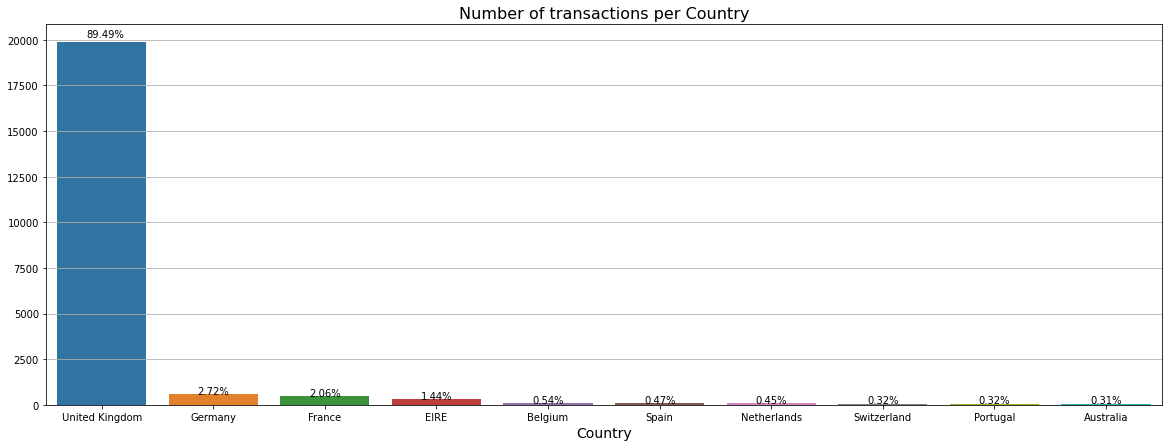

In [20]:
figure = plt.figure(figsize = [20, 7])
ax = sns.barplot(x=country_frequency.Country.value_counts().index[:10], y=country_frequency.Country.value_counts()[:10])
plt.xlabel('Country', size = 14)
plt.ylabel('')
plt.title('Number of transactions per Country', size = 16)
plt.grid(b = True, axis = 'y')
plt.grid(b = True, axis = 'y')

total = country_frequency.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/ total)
  x = p.get_x() + p.get_width() / 5 + 0.1
  y = p.get_y() + p.get_height() * 1.015 
  ax.annotate(percentage, (x, y))

**Observations:**

- Most of the orders are from **UK, around 90%,** followed by **Germany** and **France**.

### **Q2. What is the trend of sales with respect to date?**

In [0]:
transactions_data['SubTotal'] = transactions_data['UnitPrice'] * transactions_data['Quantity']

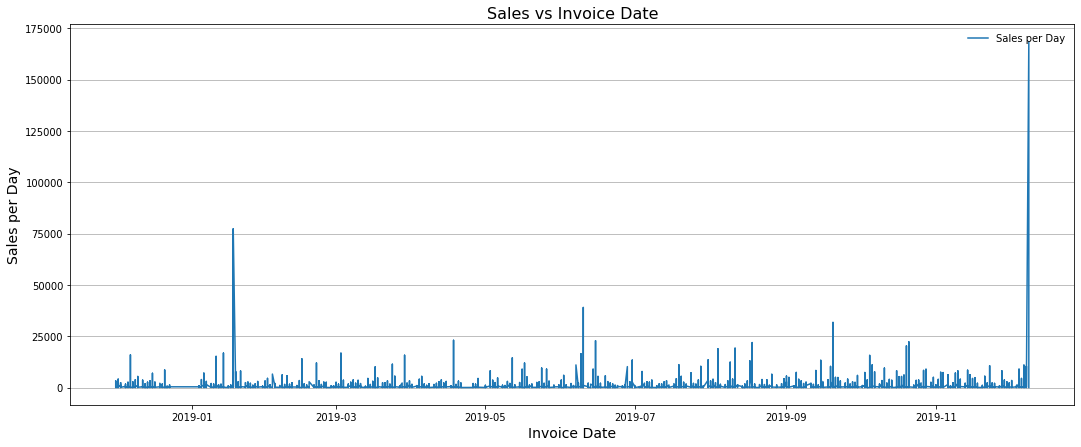

In [22]:
sales_date = pd.DataFrame(transactions_data.groupby(['InvoiceNo','InvoiceDate']).SubTotal.sum()).reset_index().drop('InvoiceNo',axis = 1)
sales_date.plot(x = 'InvoiceDate',y = 'SubTotal',kind = 'line',figsize = (18,7))

plt.xlabel('Invoice Date', size = 14)
plt.ylabel('Sales per Day', size = 14)
plt.legend(labels = ['Sales per Day'], loc = 'upper right', frameon = False)
plt.title('Sales vs Invoice Date', size = 16)
plt.grid(b = True, axis = 'y')
plt.show()

**Observations:**
- There are a **few days for which the sales are high.**
- A day in **January 2019 had almost &pound; 75,000.**
- The sales on **9th December 2019 were almost &pound; 1,75,000.**

### **Q3 What is the distribution of Revenue from each Customer?**

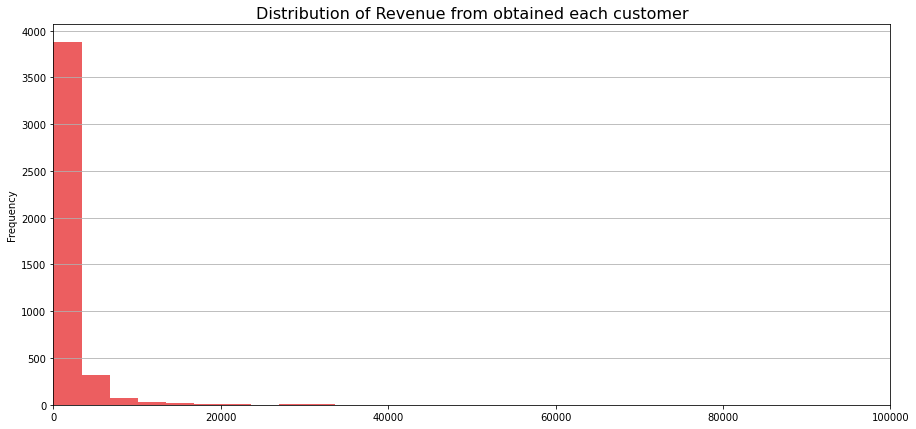

In [23]:
ax = transactions_data.groupby('CustomerID').SubTotal.sum().plot(kind = 'hist',figsize = (15,7),bins = 100,colormap = "Set1",alpha = 0.7)

plt.xlim((0,100000))
plt.title('Distribution of Revenue from obtained each customer', size = 16)
plt.grid(b = True, axis = 'y')

In [24]:
transactions_data.groupby('CustomerID').SubTotal.sum().sort_values(ascending = False).head()

CustomerID
16446.0    336942.10
14646.0    280923.02
18102.0    262876.11
17450.0    201459.41
14911.0    154963.61
Name: SubTotal, dtype: float64

**Observations:**
- The **revenue** from **most of the customers is below &pound; 20,000**
- We can also see **a few customers** from whom the **revenue** was **beyound &pound; 1,00,000**

---
### **6.1 Feature Engineering for CLV**
---

- We **cannot build a CLV prediction model on the above features.**
- We will do **feature engineering** to **create the below new features which will provide a ML model a ton of infromation.**

| Feature name | Description |
|:--|:--|
| **monetary** | The sum of all orders' monetary values per customer during the features period |
| **recency** | The time between the first and last orders that were placed by a customer during the features period |	
| **frequency** | The number of orders placed by a customer during the features period |	
| **T** | The time between the first order placed by a customer and the end of the features period |	
| **time_between** | The average time between orders for a customer during the features period |	
| **avg_basket_value** | The average monetary value of the customer's basket during the features period |	
| **avg_basket_size** | The number of items that the customer has on average in their basket during the features period |		
| **cnt_returns** | The number of orders that the customer has returned during the features period |				
| **target_monetary** | The total amount spent by a customer, including the training and target periods |

- To create **Independent Features**,** we consider** only the transactions between **1st January 2019 and 30th June 2019(6 months)**. We call this **Feature Period**
- To create the **Target variable**, **we consider** the transactions between **1st January 2019 and 30th September 2019(9 months)**. We call this **Target Period**

- Minimum date in the data

In [25]:
transactions_data['InvoiceDate'].min()

datetime.date(2018, 12, 1)

- Maximum date in the data

In [26]:
transactions_data['InvoiceDate'].max()

datetime.date(2019, 12, 9)


<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Retail/Images/6.PNG" width="" height="300" /></center>

#### Subset transactions from **1st Jan 2019 to 30th June 2019 and store them in tx_6m**

In [0]:
tx_6m = transactions_data[(pd.to_datetime(transactions_data.InvoiceDate) >= pd.to_datetime('2019-1-1',format = '%Y-%m-%d'))\
              & (pd.to_datetime(transactions_data.InvoiceDate) <= pd.to_datetime('2019-6-30',format = '%Y-%m-%d'))].reset_index(drop=True)

#### Subset transactions from **1st Jan 2019 to 30th Sept 2019 and store them in tx_9m**

In [0]:
tx_9m = transactions_data[(pd.to_datetime(transactions_data.InvoiceDate) >= pd.to_datetime('2019-1-1',format = '%Y-%m-%d'))\
              & (pd.to_datetime(transactions_data.InvoiceDate) <= pd.to_datetime('2019-9-30',format = '%Y-%m-%d'))].reset_index(drop=True)

### We will first create new features using the Feature Period data

Create a new dataframe **transactions_user** to store new feaures.
- **Each row** of the dataframe will **contain information** about **one customer**

In [0]:
transactions_user = pd.DataFrame(tx_6m['CustomerID'].unique())
transactions_user.columns = ['CustomerID']

In [30]:
transactions_user.head()

,CustomerID
0,13313.0
1,18097.0
2,16656.0
3,16875.0
4,13094.0


We use the below formula to calculate **monetary value** of each customer.


**monetary = UnitPrice x Quantity**<br>
**&Sigma; monetary w.r.t each customer**


In [0]:
tx_6m['monetary'] = tx_6m['UnitPrice'] * tx_6m['Quantity']
tx_revenue = tx_6m.groupby('CustomerID').monetary.sum().reset_index()
transactions_user = pd.merge(transactions_user, tx_revenue, on='CustomerID')

In [32]:
transactions_user.head()

,CustomerID,monetary
0,13313.0,609.74
1,18097.0,1274.04
2,16656.0,3171.87
3,16875.0,851.89
4,13094.0,1087.86


### **Q4. What is the distribution of monetary value of each customer?**

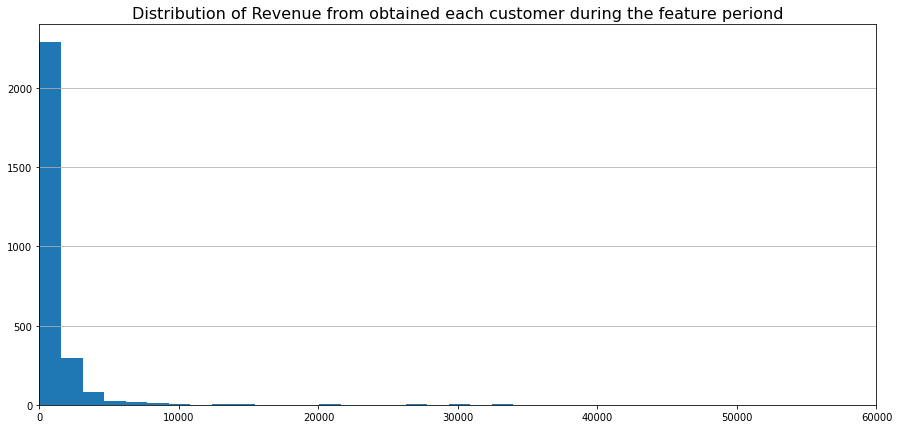

In [33]:
plt.figure(figsize = (15,7))
ax = plt.hist(transactions_user.monetary,bins = 100)
plt.xlim((0,60000))
plt.title('Distribution of Revenue from obtained each customer during the feature periond', size = 16)
plt.grid(b = True, axis = 'y')

**Observations:**
- **Most of the customers'** **cummulated monetary** value is **less than &pound;10,000**
- But there are** a few customers whose cummulated monetary value is greater than &pound; 10,000**

We use the below formula to calculate **recency** of each customer

- **recency = Last transaction date - First transaction date**

Store the **First trasnaction date for each customer** in the dataframe **tx_min_purchase**

In [0]:
tx_min_purchase = tx_6m.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']

Store the **Last trasnaction date for each customer** in the dataframe **tx_max_purchase**

In [36]:
tx_min_purchase.head()

,CustomerID,MinPurchaseDate
0,12346.0,2019-01-18
1,12347.0,2019-01-26
2,12348.0,2019-01-25
3,12350.0,2019-02-02
4,12352.0,2019-02-16


In [0]:
tx_max_purchase = tx_6m.groupby('CustomerID').InvoiceDate.max().reset_index()
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']

In [37]:
tx_max_purchase.head()

,CustomerID,MaxPurchaseDate
0,12346.0,2019-01-18
1,12347.0,2019-06-09
2,12348.0,2019-04-05
3,12350.0,2019-02-02
4,12352.0,2019-03-22


Merge the two dataframes into **tx_cal_recency** to calculate **recency**

In [0]:
tx_cal_recency = pd.merge(tx_min_purchase,tx_max_purchase,on = 'CustomerID')

In [0]:
tx_cal_recency['recency'] = (tx_cal_recency['MaxPurchaseDate'] - tx_cal_recency['MinPurchaseDate']).dt.days

In [40]:
tx_cal_recency.head()

,CustomerID,MinPurchaseDate,MaxPurchaseDate,recency
0,12346.0,2019-01-18,2019-01-18,0
1,12347.0,2019-01-26,2019-06-09,134
2,12348.0,2019-01-25,2019-04-05,70
3,12350.0,2019-02-02,2019-02-02,0
4,12352.0,2019-02-16,2019-03-22,34


Bring the **calculated receny into the dataframe transactions_user**

In [0]:
transactions_user = pd.merge(transactions_user, tx_cal_recency[['CustomerID','recency']], on='CustomerID')

In [42]:
transactions_user.head()

,CustomerID,monetary,recency
0,13313.0,609.74,124
1,18097.0,1274.04,134
2,16656.0,3171.87,147
3,16875.0,851.89,98
4,13094.0,1087.86,157


### **Q5. What is the distribution of recency for each customer?**

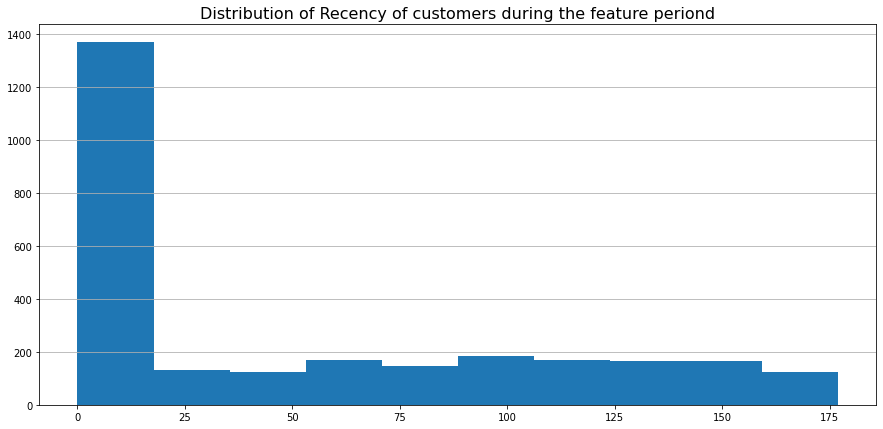

In [43]:
plt.figure(figsize = (15,7))
plt.hist(transactions_user.recency)
plt.title('Distribution of Recency of customers during the feature periond', size = 16)
plt.grid(b = True, axis = 'y')

**Observartions:**
- **Receny** **range** from **0 to 175 days**
- **Most of the Customers have a receny less than 25 days.**

Next, we calculate **frequency** of the customers by **counting number of unique Invoice numbers for each customer.**

In [44]:
tx_frequency = tx_6m.groupby('CustomerID').InvoiceNo.nunique().reset_index()
tx_frequency.columns = ['CustomerID','frequency']
tx_frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,3
2,12348.0,2
3,12350.0,1
4,12352.0,8


**Merge** the **calculated frequency with transactions_user dataframe**

In [0]:
transactions_user = pd.merge(transactions_user, tx_frequency, on='CustomerID')

In [46]:
transactions_user.head()

,CustomerID,monetary,recency,frequency
0,13313.0,609.74,124,2
1,18097.0,1274.04,134,2
2,16656.0,3171.87,147,7
3,16875.0,851.89,98,5
4,13094.0,1087.86,157,11


### **Q6. What is the distribution of frequency?**

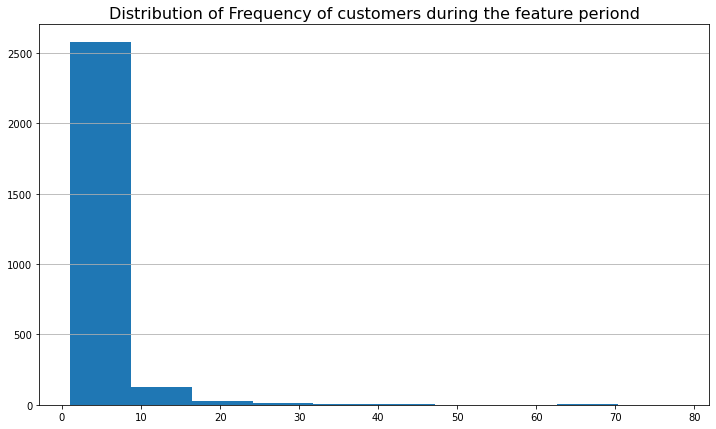

In [47]:
plt.figure(figsize = (12,7))
plt.hist(transactions_user.frequency)
plt.title('Distribution of Frequency of customers during the feature periond', size = 16)
plt.grid(b = True, axis = 'y')

**Observations:**
- **Most** of the **customers** have a **frequency less than 10 times.**
- But there are **a few customers** who have **frequency upto 80 times.**

We calculate **T** i.e; the **time between** the **first order placed by a customer and the end of the features period(30th June 2019)** in the following code

In [0]:
tx_min_purchase = tx_6m.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']

In [49]:
tx_min_purchase.head()

,CustomerID,MinPurchaseDate
0,12346.0,2019-01-18
1,12347.0,2019-01-26
2,12348.0,2019-01-25
3,12350.0,2019-02-02
4,12352.0,2019-02-16


In [50]:
tx_min_purchase['ref'] = pd.to_datetime('2019-6-30',format = '%Y-%m-%d')
tx_min_purchase.head()

,CustomerID,MinPurchaseDate,ref
0,12346.0,2019-01-18,2019-06-30
1,12347.0,2019-01-26,2019-06-30
2,12348.0,2019-01-25,2019-06-30
3,12350.0,2019-02-02,2019-06-30
4,12352.0,2019-02-16,2019-06-30


In [0]:
tx_min_purchase['T'] = (tx_min_purchase.ref - pd.to_datetime(tx_min_purchase.MinPurchaseDate)).dt.days

In [52]:
tx_min_purchase.head()

,CustomerID,MinPurchaseDate,ref,T
0,12346.0,2019-01-18,2019-06-30,163
1,12347.0,2019-01-26,2019-06-30,155
2,12348.0,2019-01-25,2019-06-30,156
3,12350.0,2019-02-02,2019-06-30,148
4,12352.0,2019-02-16,2019-06-30,134


**Merge** the **calculated T** with **transactions_user** dataframe

In [0]:
transactions_user = transactions_user.merge(tx_min_purchase[["CustomerID","T"]],on = "CustomerID",how = "left")

In [54]:
transactions_user.head()

,CustomerID,monetary,recency,frequency,T
0,13313.0,609.74,124,2,177
1,18097.0,1274.04,134,2,177
2,16656.0,3171.87,147,7,177
3,16875.0,851.89,98,5,177
4,13094.0,1087.86,157,11,177


In the following code, we calculate **time_between**	which is the **average time between orders for a customer during the features period** using the below formula<br>
- **time_between = recency / frequency**

In [0]:
transactions_user['time_between'] = transactions_user['recency']/transactions_user['frequency']

In [56]:
transactions_user.head()

,CustomerID,monetary,recency,frequency,T,time_between
0,13313.0,609.74,124,2,177,62.000000
1,18097.0,1274.04,134,2,177,67.000000
2,16656.0,3171.87,147,7,177,21.000000
3,16875.0,851.89,98,5,177,19.600000
4,13094.0,1087.86,157,11,177,14.272727


In the following code, we calculate **avg_basket_value** which is equat to :<br>
- **monetary / frequency**

In [0]:
transactions_user["avg_basket_value"] = transactions_user['monetary']/transactions_user['frequency']

In [58]:
transactions_user.head()

,CustomerID,monetary,recency,frequency,T,time_between,avg_basket_value
0,13313.0,609.74,124,2,177,62.000000,304.870000
1,18097.0,1274.04,134,2,177,67.000000,637.020000
2,16656.0,3171.87,147,7,177,21.000000,453.124286
3,16875.0,851.89,98,5,177,19.600000,170.378000
4,13094.0,1087.86,157,11,177,14.272727,98.896364


### **Q7. What is the distribution of avg_basket_value?**

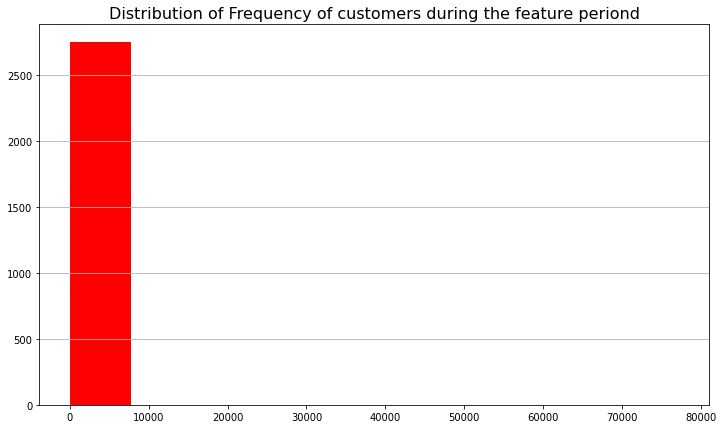

In [59]:
plt.figure(figsize = (12,7))
plt.hist(transactions_user.avg_basket_value,color = 'r')
plt.title('Distribution of Frequency of customers during the feature periond', size = 16)
plt.grid(b = True, axis = 'y')

**Observations:**
- **Most** of the **customers** have an **average basket value** of **less than &pound;10,000**
- There are also **a few customers who have average basket value upto &pound;80,000**

In the following code blocks, we **calculate the target feature i.e; target_monetary using the 9 months data.**

- **target_monetary = UnitPrice x Quantity**<br>
- **&Sigma; target_monetary w.r.t each customer**

In [0]:
tx_9m['target_monetary'] = tx_9m['UnitPrice'] * tx_9m['Quantity']
tx_revenue = tx_9m.groupby('CustomerID')['target_monetary'].sum().reset_index()
transactions_user = pd.merge(transactions_user, tx_revenue, on='CustomerID')

In [61]:
transactions_user.head()

,CustomerID,monetary,recency,frequency,T,time_between,avg_basket_value,target_monetary
0,13313.0,609.74,124,2,177,62.000000,304.870000,918.34
1,18097.0,1274.04,134,2,177,67.000000,637.020000,1808.63
2,16656.0,3171.87,147,7,177,21.000000,453.124286,7095.31
3,16875.0,851.89,98,5,177,19.600000,170.378000,1197.45
4,13094.0,1087.86,157,11,177,14.272727,98.896364,1769.46


#### **Q8. What is the distribution of target_monetary?**

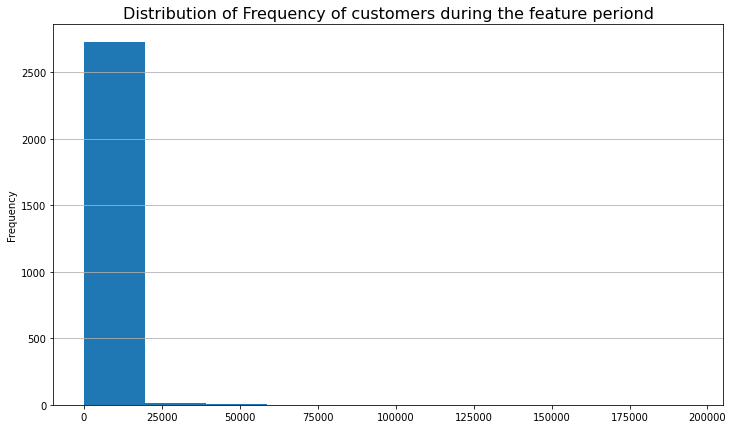

In [62]:
plt.figure(figsize = (12,7))
transactions_user.target_monetary.plot(kind = 'hist')
plt.title('Distribution of Frequency of customers during the feature periond', size = 16)
plt.grid(b = True, axis = 'y')

**Observations:**
- **Most** of the **customers** have **target_monetary** less than **&pound;25,000**
- There are **also customers whose target_monetary is as high as &pound;2,00,000**

Since **target_monetary** is the** target variable, we will remove outliers based on quartiles and Inter Quartile Range(IQR)**
- We **consider** only the **data** whose **target_monetary** is within **q1 -  1.5 x IQR and q3 + 1.5 x IQR**

In [0]:
q1 = transactions_user.target_monetary.quantile(q=0.25)

In [0]:
q3 = transactions_user.target_monetary.quantile(q=0.75)

In [0]:
iqr = q3 - q1

In [0]:
lower_bound = q1 - 1.5*iqr

In [0]:
upper_bound = q3 + 1.5*iqr

In [0]:
transactions_user = transactions_user.loc[(transactions_user.target_monetary > lower_bound) & (transactions_user.target_monetary < upper_bound),:]

In [0]:
transactions_user.reset_index(drop = True, inplace = True)

#### **Distribution of target_monetary after removing outliers**

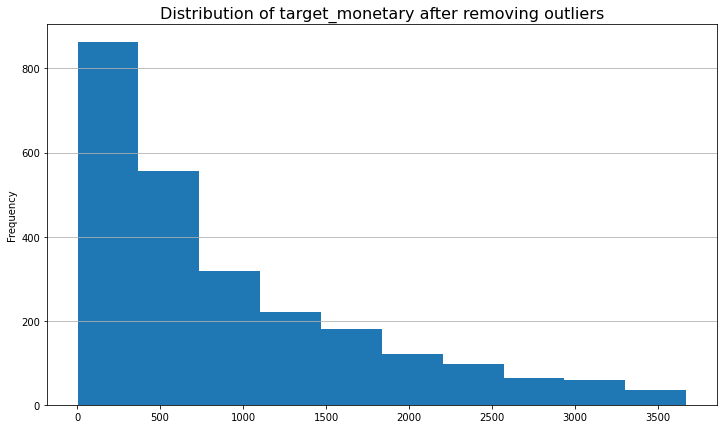

In [70]:
plt.figure(figsize = (12,7))
transactions_user.target_monetary.plot(kind = 'hist')
plt.title('Distribution of target_monetary after removing outliers', size = 16)
plt.grid(b = True, axis = 'y')

---
## **7. Building ML Models to Predict CLV of a Customer**
---

**Create** dataframe containing only **independent features**

In [0]:
X = transactions_user.drop(['CustomerID','target_monetary'],axis = 1)

**Copy** the **target variable** into a series **y**

In [0]:
y = transactions_user.target_monetary

**Combine X and y to calculate correlation between independent and dependent features**

In [0]:
data = pd.concat([X, y], axis=1)

In [75]:
data.corr().target_monetary

monetary            0.891546
recency             0.573557
frequency           0.622918
T                   0.280259
time_between        0.353072
avg_basket_value    0.441172
target_monetary     1.000000
Name: target_monetary, dtype: float64

**Observations:**
- We see that variables **T** and **time_between** are **less correlated with target_monetary**
- We will **drop these variables** from X to build better ML models

In [0]:
X.drop(['T','time_between'],axis = 1, inplace = True)

**Check** the **correlation matrix** to see **multicollinearity between independent features**

In [77]:
X.corr()

,monetary,recency,frequency,avg_basket_value
monetary,1.000000,0.610865,0.670978,0.510350
recency,0.610865,1.000000,0.739069,-0.045070
frequency,0.670978,0.739069,1.000000,-0.123504
avg_basket_value,0.510350,-0.045070,-0.123504,1.000000


- With** so many values**, it **becomes burdensome to find multicollinearity**
- **Alternatively**, we can **calculate Variance Inflation Factor(vif) of each of the variables to check multicollinearity**


### **7.1 VIF**

VIF, the **Variance Inflation Factor**, is used during regression analysis to assess **whether certain factors are correlated to each other and the severity of this correlation.** 
- It **measures** how much an **dependent factor varies due to the influence of other factors**. Essentially, the **VIF tells us the effect of correlations among your predictors.**
- The **smallest** **possible** value for **VIF** is 1,
which indicates the complete absence of collinearity. **bold text**
- As a rule of
thumb, **a VIF value that exceeds 10 indicates a problematic amount of collinearity**

In [0]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [80]:
vif

,VIF Factor,features
0,9.499966,monetary
1,3.982877,recency
2,5.858477,frequency
3,3.426819,avg_basket_value


**Observations:**
- We can see that **all the variables have vif less than 10 which indicates absence of multicollinearity**

Split the data into **train** and **test**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 200)

Below we have created a **function** **to plot the predicted vs actual values of the model based on train set and test set.**

In [0]:
def PlotScore(y_train, y_train_pred, y_test, y_test_pred):
  '''
  Plot visual of acutal and predicted for train & test data
  y_train: actual values of y train
  y_train_pred: predicted values of y_train
  y_test: actual values of y_test
  y_test_pred: predicted values of y_test
  '''
  plt.figure(figsize = [13.66, 6])
  plt.subplot(1, 2, 1)
  sns.lineplot(x = y_train, y = y_train_pred, marker = 'o')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('For Train Data')

  plt.subplot(1, 2, 2)
  sns.lineplot(x = y_test, y = y_test_pred, marker = 'o')  
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('For Test Data')
  plt.show()

For the **ideal performance** of the **model** a **reference plot** has been **below**:

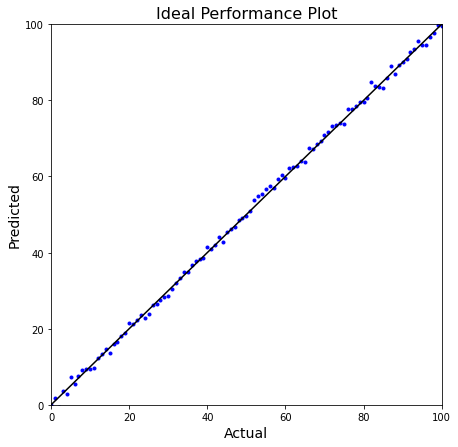

In [85]:
# Generating 100 values with 
actual = np.linspace(start = 0, stop = 100, num = 101) 
predicted = np.random.normal(actual)

plt.figure(figsize = [7, 7])
plt.plot(actual, predicted, 'b.')
plt.plot(actual, actual, 'k-') 
plt.xlabel(xlabel = 'Actual', size = 14)
plt.ylabel(ylabel = 'Predicted', size = 14)
plt.title(label = 'Ideal Performance Plot', size = 16)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

### **7.2 Linear Regression**

Acutal Values: [1383.05  446.18 1602.02  715.16  891.12]
Predicted Values: [ 939.88263357  224.96350632 1349.95577924  787.78871006  339.27845028]
RMSE (Train Data): 372.62
RMSE (Test Data): 386.92
R-Squared (Train Data): 79.0 %
R-Squared (Test Data): 80.0 %


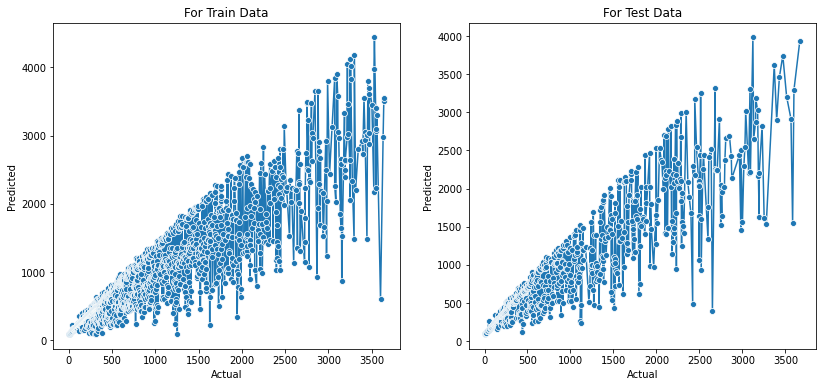

In [94]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('Acutal Values:', y_test[0:5].values)
print('Predicted Values:', y_test_pred[0:5])

# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true = y_train, y_pred = y_train_pred)), decimals = 2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))

# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(lr.score(X_train, y_train), decimals = 2)*100, '%')
print('R-Squared (Test Data):', np.round(lr.score(X_test, y_test), decimals = 2)*100, '%')

# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)

**Observations:**

- **RMSE** obtained on **train data is 372.62** while on** test** it is **386.92.**
- **R-Square is good on both train data and test data i.e; around 80%.**
- This indicates that the model is **not overfitting.**

### **7.3 Decision Tree Regressor**

In [0]:
from sklearn.tree import DecisionTreeRegressor

Acutal Values: [1383.05  446.18 1602.02  715.16  891.12]
Predicted Values: [919.26 110.55 944.1  542.71 842.33]
RMSE (Train Data): 19.42
RMSE (Test Data): 543.1
R-Squared (Train Data): 100.0 %
R-Squared (Test Data): 60.0 %


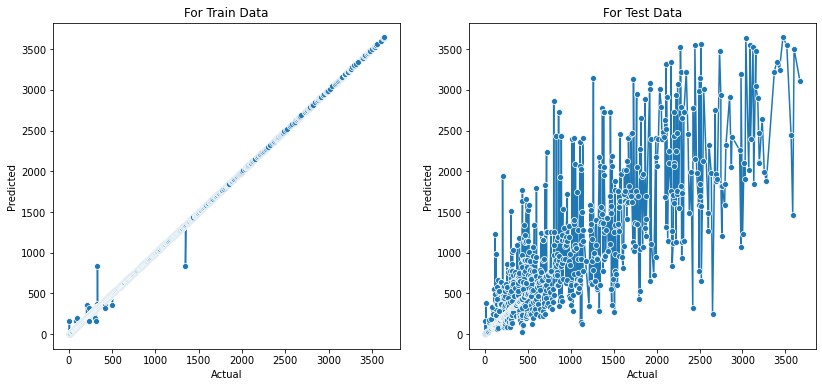

In [96]:
dtc = DecisionTreeRegressor(random_state = 42)
dtc.fit(X_train, y_train)

y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

print('Acutal Values:', y_test[0:5].values)
print('Predicted Values:', y_test_pred[0:5])

# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true = y_train, y_pred = y_train_pred)), decimals = 2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))

# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(dtc.score(X_train, y_train), decimals = 2)*100, '%')
print('R-Squared (Test Data):', np.round(dtc.score(X_test, y_test), decimals = 2)*100, '%')

# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)

**Observations:**

- **RMSE** obtained on **train data is 19.42** while on **test** it is **543.1**.
- **R-Square** obtained on **train data is 100** but it is **60 on test data.**
- This indicates that the **model is overfitting.**
- Let us **try Random Forest Regressor to reduce the overfitting.**

### **7.4 Random Forest Regressor**

In [0]:
from sklearn.ensemble import RandomForestRegressor

Acutal Values: [1383.05  446.18 1602.02  715.16  891.12]
Predicted Values: [1328.6275  115.7399 1671.6044  644.4012  529.4638]
RMSE (Train Data): 150.09
RMSE (Test Data): 418.09
R-Squared (Train Data): 97.0 %
R-Squared (Test Data): 77.0 %


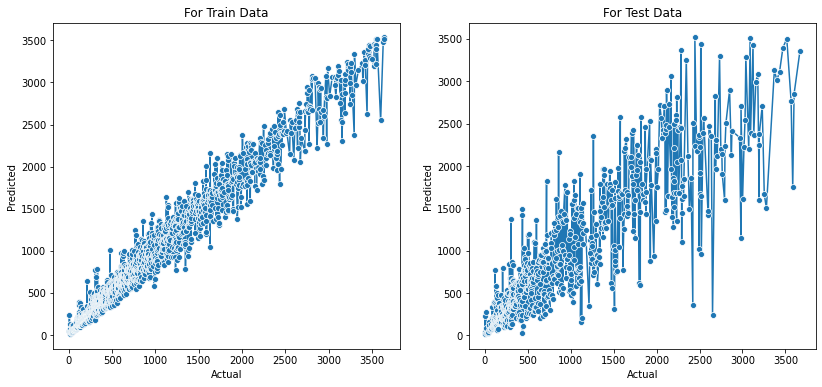

In [99]:
# Have some patience, may take some time :)
random_forest = RandomForestRegressor(random_state = 42)
random_forest.fit(X_train, y_train)

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

print('Acutal Values:', y_test[0:5].values)
print('Predicted Values:', y_test_pred[0:5])

# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true = y_train, y_pred = y_train_pred)), decimals = 2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))

# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(random_forest.score(X_train, y_train), decimals = 2)*100, '%')
print('R-Squared (Test Data):', np.round(random_forest.score(X_test, y_test), decimals = 2)*100, '%')

# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)

Observations:

- **RMSE** obtained on **train data is 150.09** while on **test** it is **418.09.**
- **R-Square** obtained on **train data is 97 but it is 77 on test data.**
- Though **overfitting is less as compared to Decision Tree Regressor, there is still an indication of overfitting in the Random Forest Regressor.**

We will go with **Linear Regression model for predicting the CLV of a customer for the upcoming quarter.**

<a id = Section8></a>

---
## **8. Conclusion**
---

- We **studied in depth about the data**, its **characteristics** and its **distribution**.

- We **explored various questions** related to the **customer behaviour** and their **residency** and **buying habits**.

- We **created new features** that **provide** **very important information to the ML models.**

- We **built 3 ML model** to predict the CLV of a customer:
  - **Linear Regression**
  - **Decision Tree Regressor**
  - **Random Forest Regressor**
  
- We saw that **Linear Regression model is better than Decision Tree and Random Forest Regressor both in terms of RMSE and R-squared.**